# CREDIT CARD FRAUD DETECTION USING NAIVE BAYES

# PROBLEM STATEMENT

- Credit card companies need to have the ability to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

- Datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- The data contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 

- Input Features: V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

- Output: 1 in case of fraud and 0 otherwise.
- Link to the dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud/home


# Table of Contents

- 1 Importing Relevant Libraries
- 2 Loading Raw Data
- 3 Preprocessing
  - 3.1 Visualizing the Variables
  - 3.2 Data Cleaning
- 4 Train Test Split
- 5 Select and Train a Model
  - 5.1 Naive Bayes Model
- 6 Apply Model on Test Set
- 7 Improving the Model
----------
Features:
- StandardScaler

# 1 Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2 Loading Raw Data

In [2]:
creditcard_df = pd.read_csv("creditcard.csv")
creditcard_df.head(3)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]

In [3]:
creditcard_df.tail(3)

Time        V1        V2        V3        V4        V5        V6  \
284804  172788.0  1.919565 -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788.0 -0.240440  0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V21       V22       V23  \
284804 -0.296827  0.708417  0.432454  ...  0.232045  0.578229 -0.037501   
284805 -0.686180  0.679145  0.392087  ...  0.265245  0.800049 -0.163298   
284806  1.577006 -0.414650  0.486180  ...  0.261057  0.643078  0.376777   

             V24       V25       V26       V27       V28  Amount  Class  
284804  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88      0  
284805  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00      0  
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00      0  

[3 rows x 31 columns]

In [4]:
creditcard_df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# 3 Preprocessing

## 3.1 Visualizing the Variables

In [6]:
non_fraud = creditcard_df[creditcard_df['Class']==0]
fraud = creditcard_df[creditcard_df['Class']==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [7]:
fraud.head(2)

Time        V1        V2        V3        V4        V5        V6  \
541  406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623  472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

           V7        V8        V9  ...       V21       V22       V23  \
541 -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623  0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   

          V24       V25       V26       V27       V28  Amount  Class  
541  0.320198  0.044519  0.177840  0.261145 -0.143276     0.0      1  
623 -0.293803  0.279798 -0.145362 -0.252773  0.035764   529.0      1  

[2 rows x 31 columns]

In [8]:
non_fraud.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

In [9]:
print( 'fraud transactions percentage =', (len(fraud) / len(creditcard_df) )*100,"%")

fraud transactions percentage = 0.1727485630620034 %


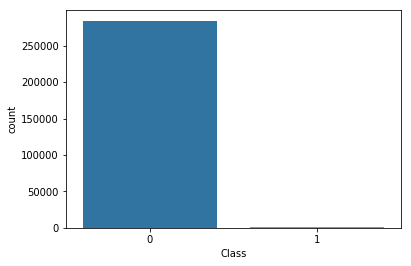

In [10]:
sns.countplot(creditcard_df['Class'], label = "Count") 
# Data is extremely unbalanced

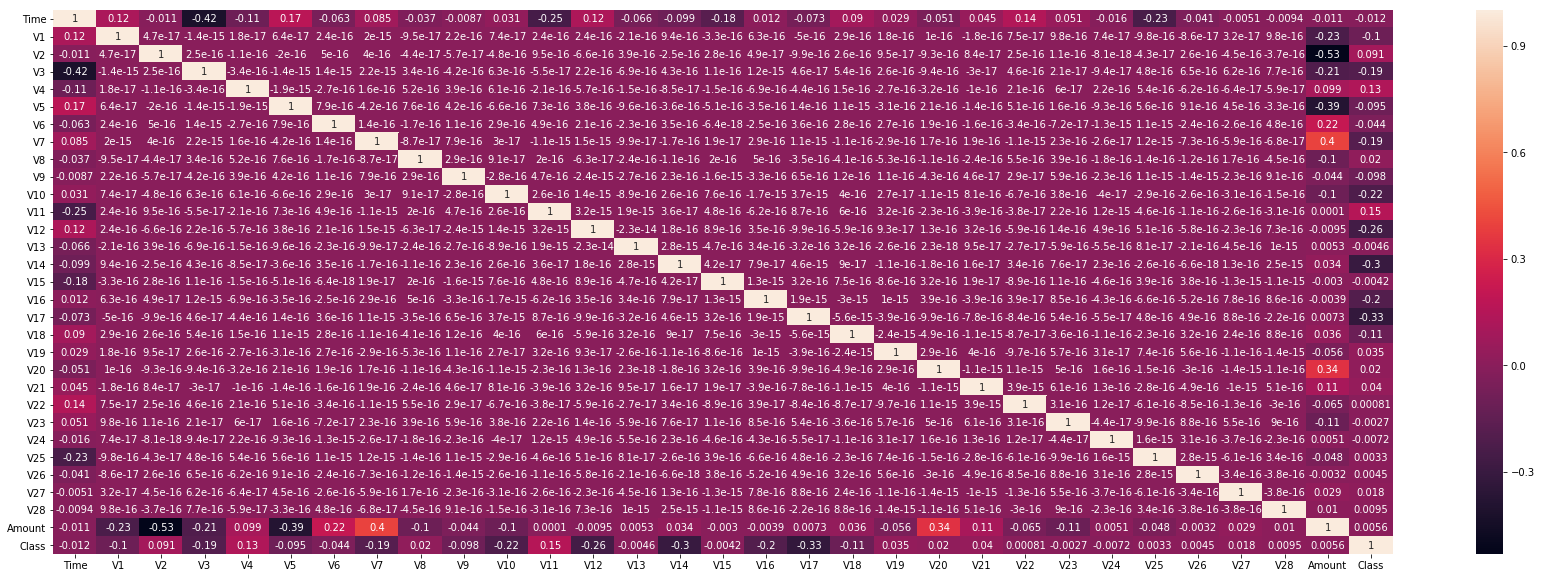

In [11]:
plt.figure(figsize=(30,10)) 
sns.heatmap(creditcard_df.corr(), annot=True) 
# Most of the dataset is uncorrelated, its probably because the data is a result of Principal Componenet Analysis (PCA)
# Features V1 to V28 are Principal Components resulted after propagating real features through PCA. 

In [12]:
column_headers = creditcard_df.columns.values

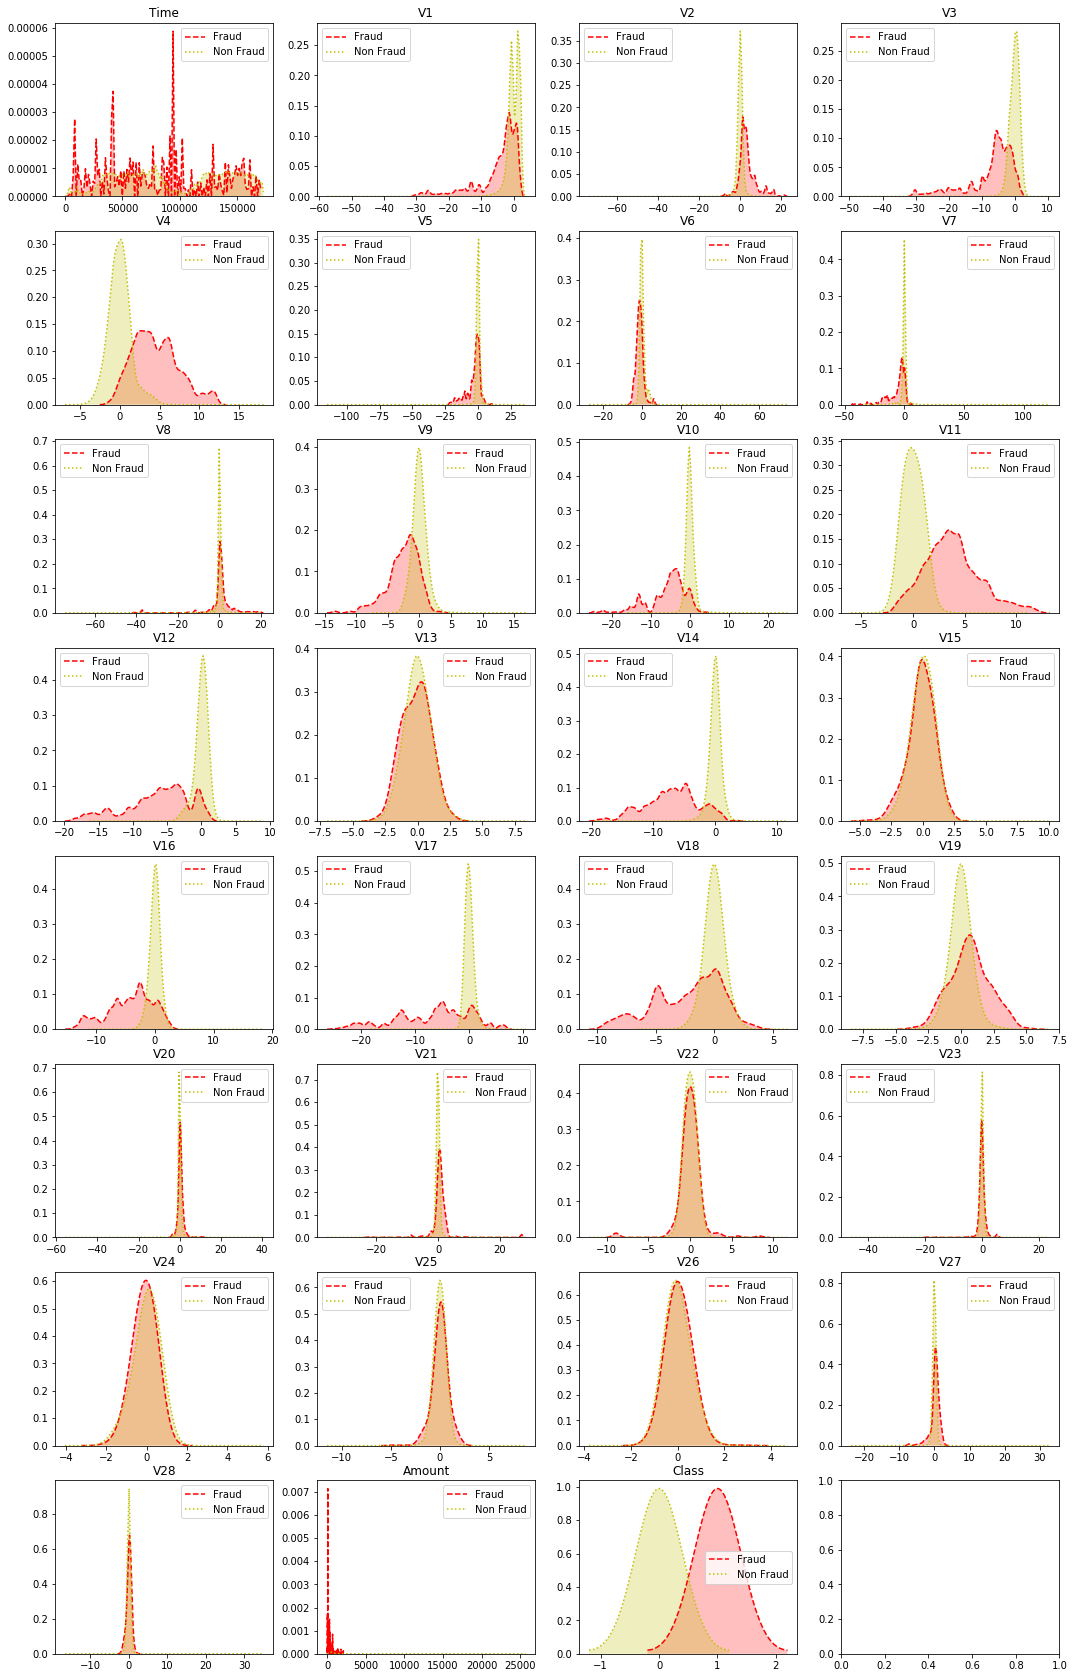

In [13]:
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
i = 1

fig, ax = plt.subplots(8,4,figsize=(18,30))
for column_header in column_headers:    
    plt.subplot(8,4,i)
    sns.kdeplot(fraud[column_header], bw = 0.4, label = "Fraud", shade=True, color="r", linestyle="--")
    sns.kdeplot(non_fraud[column_header], bw = 0.4, label = "Non Fraud", shade=True, color= "y", linestyle=":")
    plt.title(column_header, fontsize=12)
    i = i + 1
plt.show();

## 3.2 Data Cleaning

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
creditcard_df['Amount_Norm'] = sc.fit_transform(creditcard_df['Amount'].values.reshape(-1,1))
creditcard_df.shape

(284807, 32)

In [15]:
creditcard_df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   

        V27       V28  Amount  Class  Amount_Norm  
0  0.133558 -0.021053  149.62      0     0.244964  
1 -0.008983  0.014724    2.69      0    -0.342475  

[2 rows x 32 columns]

In [16]:
creditcard_df = creditcard_df.drop(['Amount'], axis = 1)

In [17]:
# Let's drop the target label coloumns
X = creditcard_df.drop(['Class'],axis=1)
y = creditcard_df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [18]:
X.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   

        V25       V26       V27       V28  Amount_Norm  
0  0.128539 -0.189115  0.133558 -0.021053     0.244964  
1  0.167170  0.125895 -0.008983  0.014724    -0.342475  

[2 rows x 30 columns]

In [19]:
y.head(2)

0    0
1    0
Name: Class, dtype: int64

# 4 Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((227845, 30), (227845,), (56962, 30), (56962,))

# 5 Select and Train a Model

## 5.1 Naive Bayes Model

In [21]:
from sklearn.naive_bayes import GaussianNB 
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

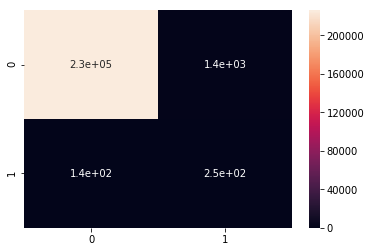

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

# 6 Apply Model on Test Set

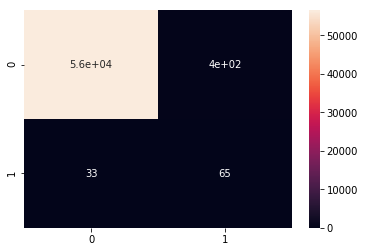

In [23]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [24]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.66      0.23        98

   micro avg       0.99      0.99      0.99     56962
   macro avg       0.57      0.83      0.61     56962
weighted avg       1.00      0.99      0.99     56962



# 7 Improving the Model

In [25]:
X = creditcard_df.drop(['Time','V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28','Class'], axis = 1)
X.shape

(284807, 18)

In [26]:
X.head(3)

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V9       V10       V11       V12       V14       V16       V17  \
0  0.363787  0.090794 -0.551600 -0.617801 -0.311169 -0.470401  0.207971   
1 -0.255425 -0.166974  1.612727  1.065235 -0.143772  0.463917 -0.114805   
2 -1.514654  0.207643  0.624501  0.066084 -0.165946 -2.890083  1.109969   

        V18       V19       V21  Amount_Norm  
0  0.025791  0.403993 -0.018307     0.244964  
1 -0.183361 -0.145783 -0.225775    -0.342475  
2 -0.121359 -2.261857  0.247998     1.160686

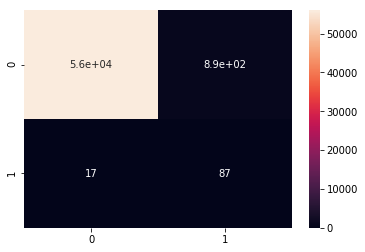

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56858
           1       0.09      0.84      0.16       104

   micro avg       0.98      0.98      0.98     56962
   macro avg       0.54      0.91      0.58     56962
weighted avg       1.00      0.98      0.99     56962



In [29]:
print("Number of fraud points in the testing dataset = ", sum(y_test))

Number of fraud points in the testing dataset =  104
